In [1]:
import pandas as pd
import numpy as np
from multiscaleio.core.expansions import ReshiftedExpansion, MultiscaleExpansion

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
test = pd.read_csv("../data/DailyDelhiClimateTest.csv")
train = pd.read_csv("../data/DailyDelhiClimateTrain.csv")

In [4]:
rs = ReshiftedExpansion(window=4, date_col="date", keep_t0=True)
data = rs.fit_transform(train)

In [5]:
sh = pd.DataFrame(data, columns=rs.get_feature_names_out())
sh.head()

,date,meantemp,humidity,wind_speed,meanpressure,meantemp_shift_1,humidity_shift_1,wind_speed_shift_1,meanpressure_shift_1,meantemp_shift_2,humidity_shift_2,wind_speed_shift_2,meanpressure_shift_2,meantemp_shift_3,humidity_shift_3,wind_speed_shift_3,meanpressure_shift_3
0,2013-01-01,10.0,84.5,0.0,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,7.4,92.0,2.98,1017.8,10.0,84.5,0.0,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,7.166667,87.0,4.633333,1018.666667,7.4,92.0,2.98,1017.8,10.0,84.5,0.0,1015.666667,NaN,NaN,NaN,NaN
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,7.166667,87.0,4.633333,1018.666667,7.4,92.0,2.98,1017.8,10.0,84.5,0.0,1015.666667
4,2013-01-05,6.0,86.833333,3.7,1016.5,8.666667,71.333333,1.233333,1017.166667,7.166667,87.0,4.633333,1018.666667,7.4,92.0,2.98,1017.8


In [6]:
ms = MultiscaleExpansion(scale=[3, 7], date_col="date")
data = ms.fit_transform(sh)

In [7]:
sc = pd.DataFrame(data, columns=ms.get_feature_names_out())
sc.head()

,date,meantemp_mean_3,humidity_mean_3,wind_speed_mean_3,meanpressure_mean_3,meantemp_shift_1_mean_3,humidity_shift_1_mean_3,wind_speed_shift_1_mean_3,meanpressure_shift_1_mean_3,meantemp_shift_2_mean_3,...,wind_speed_shift_1_mean_7,meanpressure_shift_1_mean_7,meantemp_shift_2_mean_7,humidity_shift_2_mean_7,wind_speed_shift_2_mean_7,meanpressure_shift_2_mean_7,meantemp_shift_3_mean_7,humidity_shift_3_mean_7,wind_speed_shift_3_mean_7,meanpressure_shift_3_mean_7
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,8.188889,87.833333,2.537778,1017.377778,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-04,7.744444,83.444444,2.948889,1017.877778,8.188889,87.833333,2.537778,1017.377778,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-05,7.277778,81.722222,3.188889,1017.444444,7.744444,83.444444,2.948889,1017.877778,8.188889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
train_eda = train.copy()
train_eda["month"] = pd.to_datetime(train["date"]).dt.month

In [ ]:
from multiscaleio.core.interpolate import ProphetInterpolator

pdata = train[["date", "humidity"]].reset_index(drop=True).copy()
pdata["humidity"][int(len(pdata)/1.15):] = np.nan
pi = ProphetInterpolator(
    date_index="date", 
    uncertainty_fit_logs=True, 
    add_sampled_uncertainty=True,
    uncertainty_sample_method="garch",
    weekly_seasonality=False,
    uncertainty_scaling_factor=1,
    growth="flat"
)
int_ = pi.fit_transform(pdata)

C:\Users\Tobia\AppData\Local\Temp\ipykernel_17276\4274237101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdata["humidity"][int(len(pdata)/1.15):] = np.nan


Iteration:      1,   Func. Count:      9,   Neg. LLF: 4773.8417394155695
Iteration:      2,   Func. Count:     18,   Neg. LLF: 5023.30784072861
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4957.3634423551175
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4690.956720098888
Iteration:      5,   Func. Count:     44,   Neg. LLF: 4896.551504694423
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4689.710109028652
Iteration:      7,   Func. Count:     61,   Neg. LLF: 4690.1461597745
Iteration:      8,   Func. Count:     70,   Neg. LLF: 4688.292644359715
Iteration:      9,   Func. Count:     78,   Neg. LLF: 4688.001961439677
Iteration:     10,   Func. Count:     86,   Neg. LLF: 4687.360861183779
Iteration:     11,   Func. Count:     94,   Neg. LLF: 4687.227584846721
Iteration:     12,   Func. Count:    102,   Neg. LLF: 4687.153549324446
Iteration:     13,   Func. Count:    110,   Neg. LLF: 4687.082902302498
Iteration:     14,   Func. Count:    118,   Neg. LLF: 4687.004035

<AxesSubplot: >

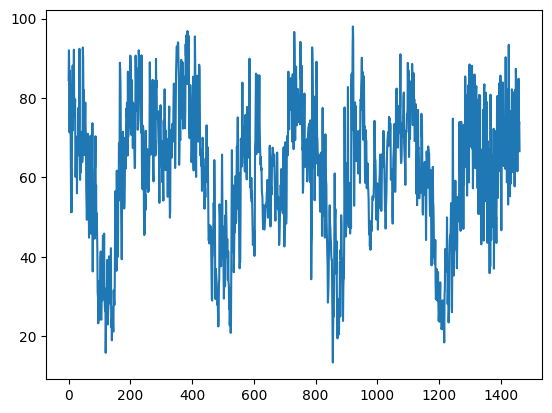

In [24]:
pd.Series(int_).plot()

<AxesSubplot: >

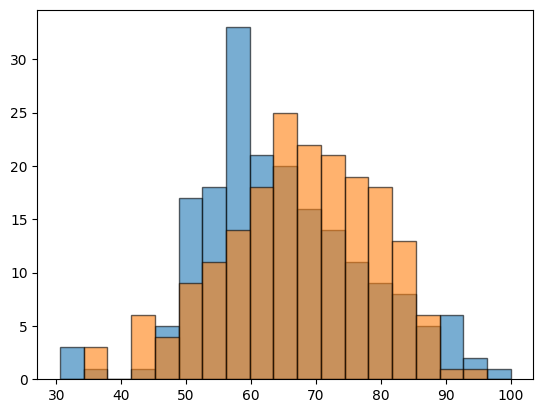

In [ ]:
nan_idx = pdata[pdata["humidity"].isna()].index.to_list()

min_ = min(int_[nan_idx].min(), train["humidity"].iloc[nan_idx].min())
max_ = max(int_[nan_idx].max(), train["humidity"].iloc[nan_idx].max())

train["humidity"].iloc[nan_idx].reset_index(drop=True).hist(bins=np.linspace(min_, max_, 20), ec="k", grid=False, alpha=.6)
pd.Series(int_[nan_idx]).hist(bins=np.linspace(min_, max_, 20), ec="k", grid=False, alpha=.6)